<a href="https://colab.research.google.com/github/sumanankur108/eda-theory-da/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# @title Ankur Suman 21BDS0097

In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/MyDrive

/content/drive/MyDrive


In [4]:
!ls

'Colab Notebooks'			        index-file.ipynb
 data_mining_lab_assessment		        index-file.pdf
 deep_learning_lab_assessment		        insta_sentiment_analysis_results.csv
 emoji_usage.csv			        machine_learning_lab_assessment
 endangered_animals_partitioned		        other-projects
 exploratory-data-analysis		        project_final_year
 face-recognition			        top_chat_partners.csv
 foundation-of-data-science-theory-assessment


In [5]:
%cd exploratory-data-analysis/

/content/drive/MyDrive/exploratory-data-analysis


In [6]:
!ls

liver_data.csv


In [7]:
# @title Importing the libraries
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
!pwd

/content/drive/MyDrive/exploratory-data-analysis


In [ ]:
# @title Loading the dataset

In [10]:
df = pd.read_csv("/content/drive/MyDrive/exploratory-data-analysis/liver_data.csv")

In [11]:
print(df.head())

   Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3         

In [12]:
print(df.shape)

(30691, 11)


In [13]:
print(df.tail())

       Age of the patient Gender of the patient  Total Bilirubin  \
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
30686               1.0                          610.0   
30687               1.3                          482.0   
30688               3.0                          542.0   
30689               1.0                          231.0   
30690               1.6                          253.0   

        Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
30686                            17.0                             28.0   
30687                            22.0                             34.0   
30688               

In [14]:
# @title Data Cleaning

In [28]:
cleaned_df = df.dropna() # drop rows with missing values

In [29]:
# Clean column names by stripping leading/trailing whitespaces
cleaned_df.columns = cleaned_df.columns.str.strip()

In [30]:
print(cleaned_df.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


In [31]:
# @title Performing Principal Component Analysis (PCA)

In [32]:
# Separate features and target
X = cleaned_df.drop(columns=['Result'])
y = cleaned_df['Result']

In [33]:
# Convert categorical column ('Gender of the patient') to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Gender of the patient'], drop_first=True)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [35]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
# Create a dataframe for PCA output
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Result'] = y.values

In [39]:
# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26943834 0.1926135 ]


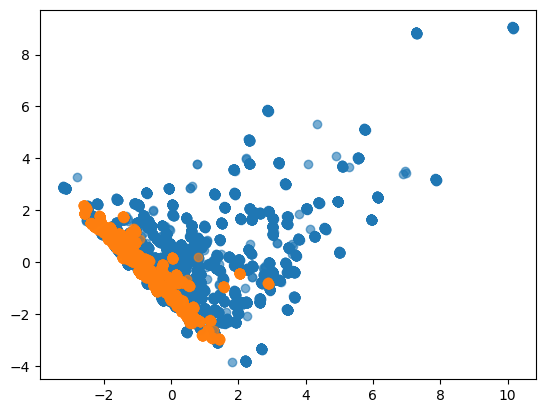

In [40]:
# Plot each class in the PCA scatter plot
for label in sorted(pca_df['Result'].dropna().unique()):
    subset = pca_df[pca_df['Result'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}', alpha=0.6)

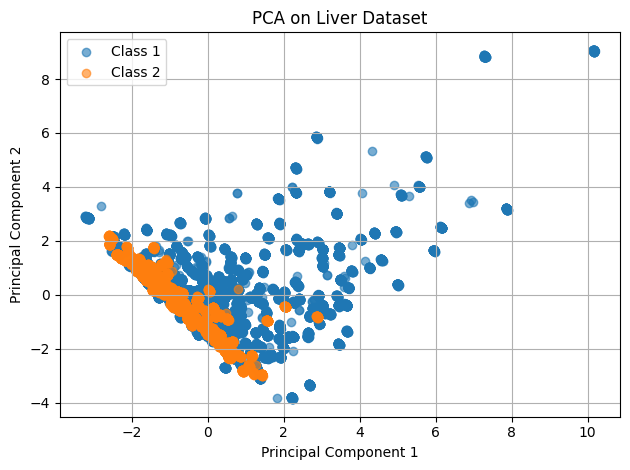

In [41]:
# Plot each class in the PCA scatter plot
for label in sorted(pca_df['Result'].dropna().unique()):
    subset = pca_df[pca_df['Result'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Liver Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26943834 0.1926135 ]
